In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.figure_factory as ff
import plotly.express as px
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
dataset = pd.read_csv("dataset.csv")

In [ ]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,F,71,2,1,1,2,2,1,1,1,1,2,1,1,2,NO
2996,F,75,1,2,1,1,1,2,2,2,2,1,1,2,1,NO
2997,F,62,2,2,2,1,2,2,2,2,1,1,2,2,2,YES
2998,M,30,1,1,2,2,2,2,2,2,2,1,2,1,2,YES


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [ ]:
dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [ ]:
dataset.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
dataset.isnull().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC_DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


In [ ]:
dataset.shape

(3000, 16)

In [ ]:
# Data Visualization


In [ ]:
hist_data =[dataset["AGE"].values]
group_labels = ['AGE']
ax=ff.create_distplot(hist_data, group_labels)

ax.show()

<Axes: xlabel='LUNG_CANCER', ylabel='count'>

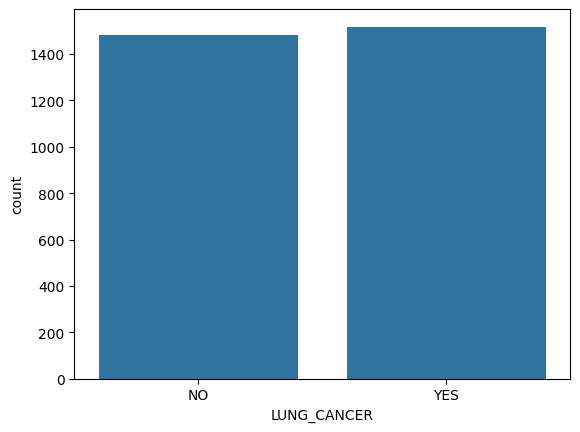

In [ ]:
sns.countplot(x = 'LUNG_CANCER',data = dataset)

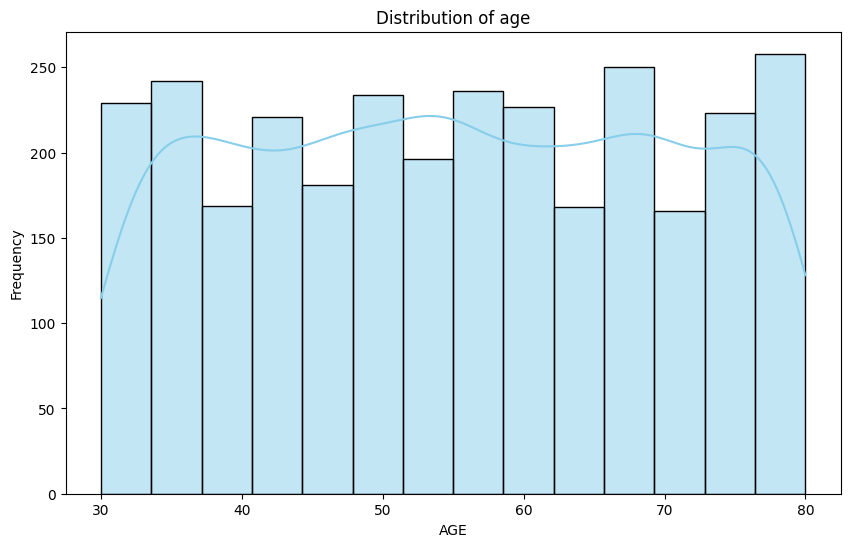

In [ ]:
# Question 1:- What is the distribution of age Lung Cancer in the Dataset ?
plt.figure(figsize=(10,6))
sns.histplot(dataset['AGE'].dropna(), kde = True, color = 'skyblue')
plt.title('Distribution of age')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Question 2 :- What is the percentage of male and female patient ?
gender_counts = dataset['GENDER'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100
gender_percentages

,count
GENDER,
M,50.466667
F,49.533333


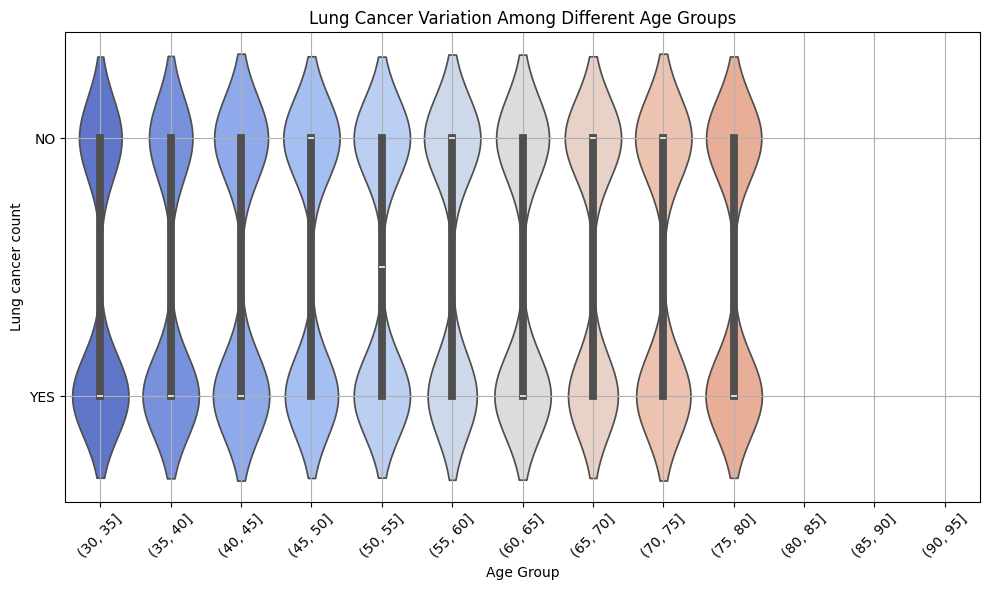

In [ ]:
# Question 3 :- What is the Lung Cancer count among diffrent age group ?
age_groups = dataset.groupby(pd.cut(dataset['AGE'], bins=range(30, 100,5)))

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x=pd.cut(df['AGE'], bins=range(30, 100,5)), y='LUNG_CANCER', palette='coolwarm')
plt.title('Lung Cancer Variation Among Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Lung cancer count')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
anxiety_levels = df['ANXIETY']
chronic_levels = df['CHRONIC_DISEASE']

# Calculate the correlation coefficient
correlation = anxiety_levels.corr(chronic_levels)

print("Correlation coefficient between ANXIETY and CHRONIC_DISEASE :", correlation)

Correlation coefficient between ANXIETY and CHRONIC_DISEASE : 0.0169030427882174


<Axes: xlabel='LUNG_CANCER', ylabel='count'>

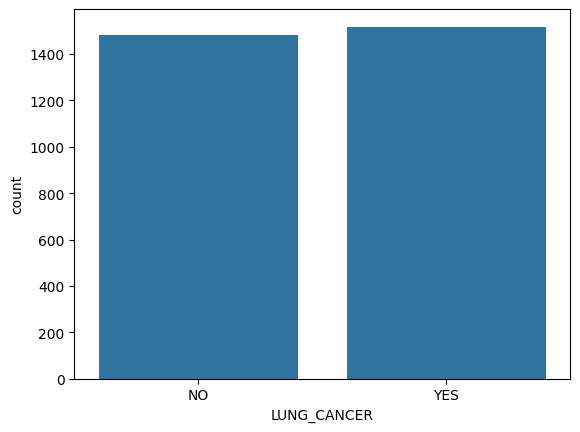

<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

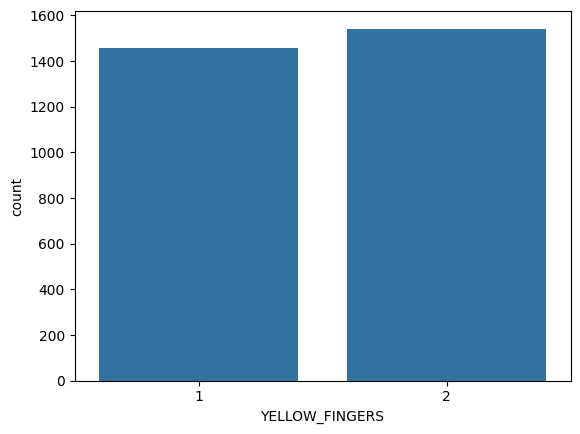

In [ ]:
sns.countplot(x = 'YELLOW_FINGERS',data = df)

In [ ]:
dataset['ANXIETY'].unique()

array([1, 2])

<Axes: xlabel='CHRONIC_DISEASE', ylabel='count'>

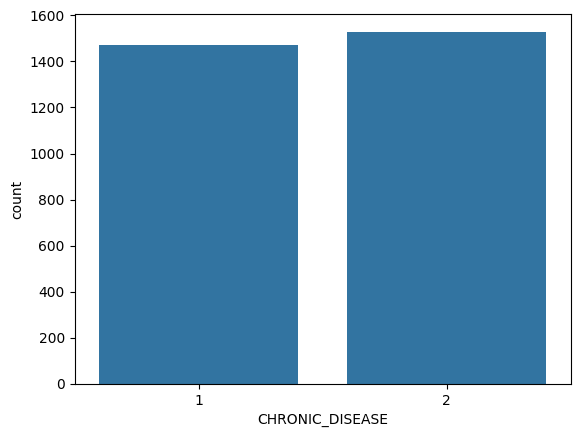

In [ ]:
sns.countplot(x = 'CHRONIC_DISEASE',data = dataset)

In [ ]:
values = dataset['LUNG_CANCER'].value_counts().tolist()
names = list(dict(dataset['LUNG_CANCER'].value_counts()).keys())

px.pie(dataset, values=values, names=names, hole = 0.5,
       color_discrete_sequence=["firebrick", "green"])

In [ ]:
le = preprocessing.LabelEncoder()
dataset['GENDER'] = le.fit_transform(dataset['GENDER'])
dataset['LUNG_CANCER'] = le.fit_transform(dataset['LUNG_CANCER'])

In [ ]:
dataset['GENDER']

,GENDER
0,1
1,0
2,0
3,1
4,0
...,...
2995,0
2996,0
2997,0
2998,1


In [ ]:
dataset['LUNG_CANCER']

,LUNG_CANCER
0,0
1,0
2,1
3,1
4,0
...,...
2995,0
2996,0
2997,1
2998,1


In [ ]:
dataset

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,1,65,1,1,1,2,2,1,2,2,2,2,2,2,1,0
1,0,55,1,2,2,1,1,2,2,2,1,1,1,2,2,0
2,0,78,2,2,1,1,1,2,1,2,1,1,2,1,1,1
3,1,60,2,1,1,1,2,1,2,1,1,2,1,2,2,1
4,0,80,1,1,2,1,1,2,1,2,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,71,2,1,1,2,2,1,1,1,1,2,1,1,2,0
2996,0,75,1,2,1,1,1,2,2,2,2,1,1,2,1,0
2997,0,62,2,2,2,1,2,2,2,2,1,1,2,2,2,1
2998,1,30,1,1,2,2,2,2,2,2,2,1,2,1,2,1


In [ ]:
print(dataset.corr()["LUNG_CANCER"].abs().sort_values(ascending=False))

LUNG_CANCER              1.000000
WHEEZING                 0.038606
AGE                      0.035712
COUGHING                 0.033087
ALCOHOL_CONSUMING        0.030465
PEER_PRESSURE            0.024644
GENDER                   0.016114
ANXIETY                  0.014525
SMOKING                  0.014219
YELLOW_FINGERS           0.013003
CHRONIC_DISEASE          0.010235
SWALLOWING_DIFFICULTY    0.008421
ALLERGY                  0.006508
CHEST_PAIN               0.002699
SHORTNESS_OF_BREATH      0.002380
FATIGUE                  0.002249
Name: LUNG_CANCER, dtype: float64
